In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from cpsplines.graphics.plot_one_smoothing import plot_curves, plot_surfaces
from cpsplines.fittings.grid_cpsplines import GridCPsplines

In [12]:
faithful =  pd.read_csv("../data/faithful.csv")

In [13]:
poisson = GridCPsplines(deg=(3,),
                        ord_d=(2,),
                        n_int=(10,),
                        sp_method="grid_search",
                        sp_args={"grid": ((0.1,),)},
                        family="poisson")

poisson.fit(x=(faithful["eruptions"].values, ), y=faithful["waiting"].values)

[Solve the problem with smoothing parameters (0.1,): ] Elapsed time (s): 0.087926


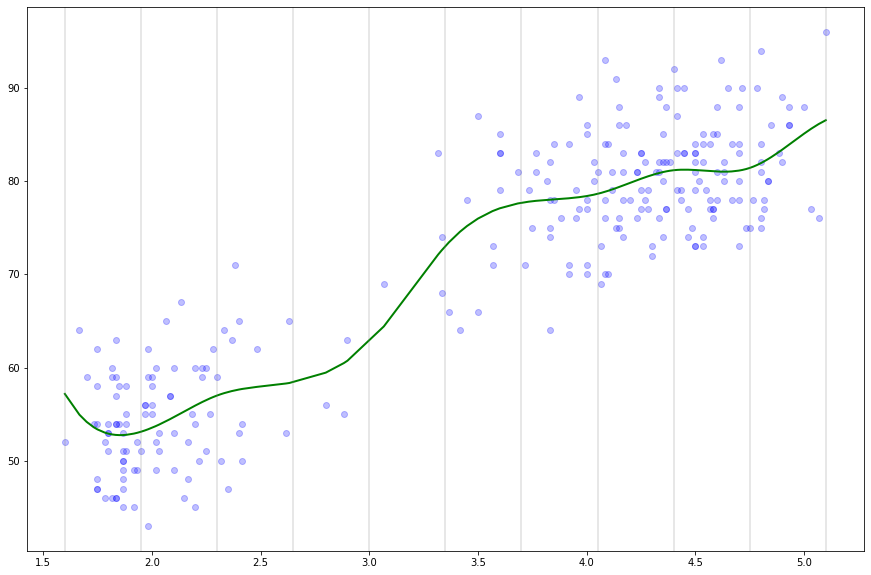

In [14]:
plot_1 = plot_curves(
    fittings=(poisson, ),
    col_curve=("g", ),
    knot_positions=True,
    constant_constraints=True,
    x=(faithful["eruptions"].values,), 
    y=(faithful["waiting"].values,),
    col_pt=("b",),
    alpha=0.25
)

In [15]:
xedges = np.linspace(faithful["eruptions"].min(), faithful["eruptions"].max(), 101)
yedges = np.linspace(faithful["waiting"].min(), faithful["waiting"].max(), 101)
hist, xedges, yedges = np.histogram2d(faithful.iloc[:, 0], faithful.iloc[:, 1], (xedges, yedges))
x= ((xedges[1:] - xedges[:-1]) /2) + xedges[:100]
z = ((yedges[1:] - yedges[:-1]) /2) + yedges[:100]

In [16]:
poisson = GridCPsplines(deg=(3,3),
                          ord_d=(2,2),
                          n_int=(10,10),
                          sp_method="grid_search",
                          sp_args={"grid": ((0.1,),(0.1,))},
                          family="poisson")
poisson.fit(x=(x, z), y=hist)

[Solve the problem with smoothing parameters (0.1, 0.1): ] Elapsed time (s): 1.781559


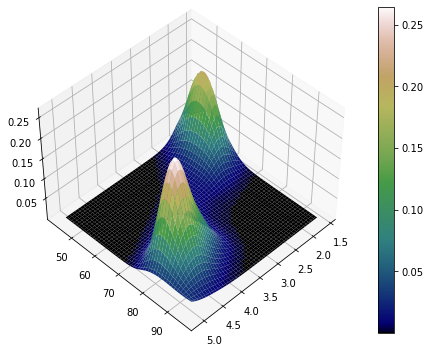

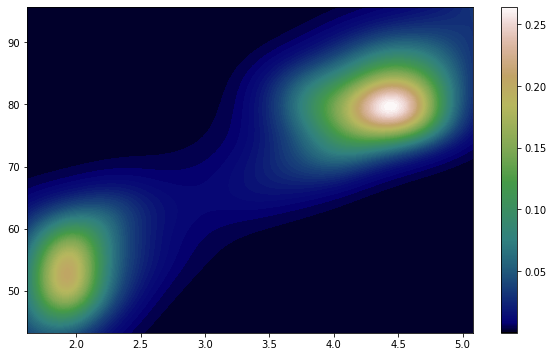

In [17]:
plot6 = plot_surfaces(
    fittings=(poisson,),
    col_surface=("gist_earth",),
    orientation=(45,45),
    figsize=(10, 6),
)